### importing Modules

In [1]:
import pandas as pd                                        
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Loding The Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info() # we checking basic  info related to dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum() # There is no missing values in dataset.

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Preprocessing the Dataset

<AxesSubplot:>

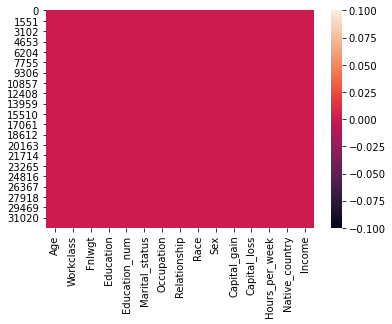

In [5]:
sns.heatmap(df.isnull()) # cross checking through graph is there in missing values precent.clearly there is no missing values


### Exploratory Data analysis(EDA)

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
df.describe() #statistics info

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

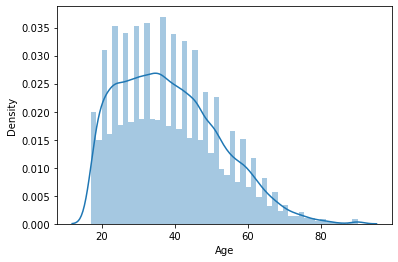

In [8]:
sns.distplot(df.Age)

In [9]:
df.Workclass.value_counts() 
#While checking the unique values for workclass, we see that we have 7 different types of values, 
#along with some missing values represented by ‘?’.
#The count of null values is 1836, which is around 5% of the data.

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

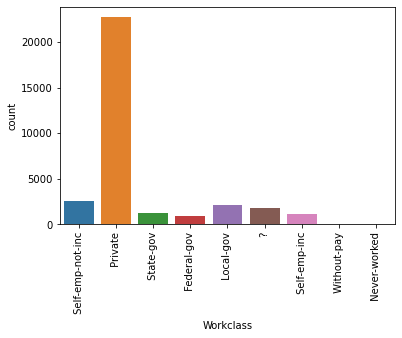

In [10]:
sns.countplot(df.Workclass)
plt.xticks(rotation=90)
#We observe that majority of the people belong to ‘Private’ sector workclass.

In [11]:
df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

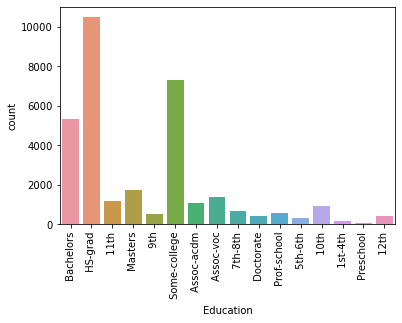

In [12]:
sns.countplot(df.Education)
plt.xticks(rotation=90)
#We observe no missing values in this column, and also find out that majority of the people have education level as ‘HS-grad’, 
#followed by ‘Some-college’ and ‘Bachelors’.

In [13]:
df.Occupation.value_counts() #some missing values are there

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

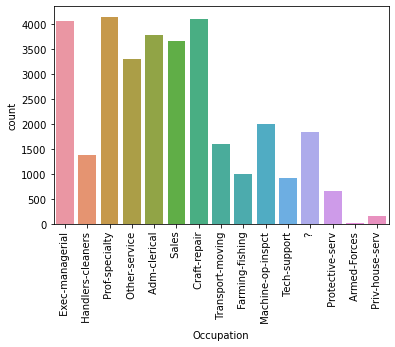

In [14]:
sns.countplot(df.Occupation)
plt.xticks(rotation=90)

In [15]:
df.Native_country.value_counts() #some missing values are there

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

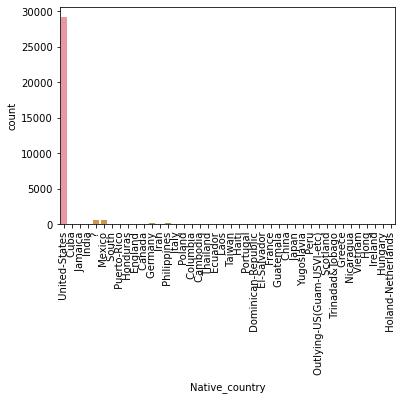

In [16]:
sns.countplot(df.Native_country)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Income', ylabel='count'>

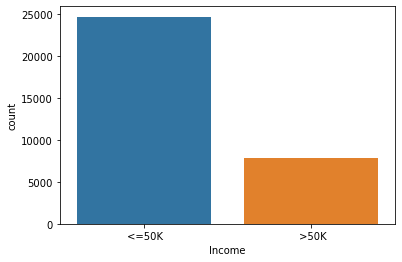

In [17]:
sns.countplot(df.Income)

In [18]:
from sklearn.preprocessing import LabelEncoder # having string data need to convert into numric for further calculations.
lb=LabelEncoder()
df['Income']=lb.fit_transform(df['Income'])

<AxesSubplot:>

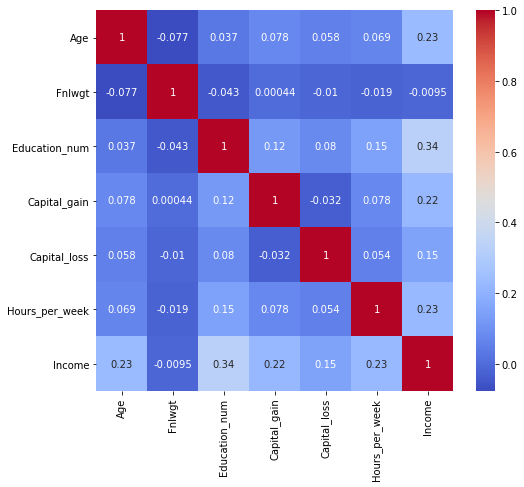

In [19]:
corr=df.corr()
plt.figure(figsize=(8,7))        
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [20]:
#we will fill the missing values in our data, and group certain categories logically, to allow our model to learn better.
df['Workclass']=df['Workclass'].replace("?",'Private')
df['Occupation']=df['Occupation'].replace("?",'Prof-specialty')
df['Native_country']=df['Native_country'].replace("?",'United-States')

Age                  AxesSubplot(0.125,0.816017;0.168478x0.0639831)
Fnlwgt            AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
Education_num     AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
Capital_gain      AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
Capital_loss         AxesSubplot(0.125,0.739237;0.168478x0.0639831)
Hours_per_week    AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
Income            AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
dtype: object

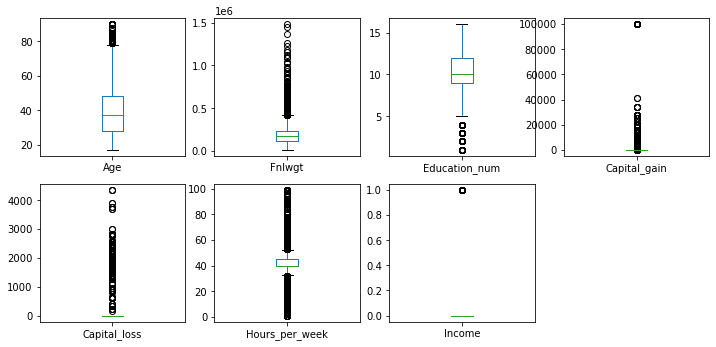

In [21]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(12,30)) #checking Outlier ,some of columns having high  outlier.

In [22]:
#Removing OUtlier
from scipy.stats import zscore 
z=np.abs(zscore(df['Fnlwgt']))
z=np.abs(zscore(df['Capital_gain']))
z=np.abs(zscore(df['Capital_loss']))
z=np.abs(zscore(df['Hours_per_week']))
z=np.abs(zscore(df['Education_num']))

In [23]:
q=df['Hours_per_week'].quantile(0.95) # Hours per week having skewd data so need to remove .
df1=df[df['Hours_per_week']<q]

In [24]:
df.skew()
# We treat ‘Fnlwgt’, ‘Capital_gain’ and ‘Capital_loss’ column for skewness, 
#and use square-root transform and cube-root transform methods
#(since we cannot apply log and boxcox transform to columns where 0 values are present)

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [25]:
gain_df=np.log(df['Capital_gain']) #log Trasform
gain_df.skew()

nan

In [26]:
df_loss=np.sqrt(df['Capital_loss']) # Square Root Transform
df_loss.skew()

4.376279267452659

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

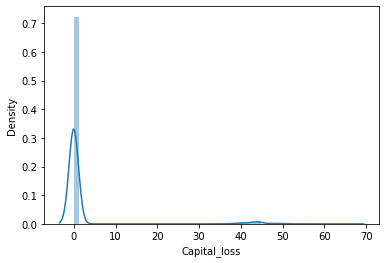

In [27]:
sns.distplot(df_loss)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

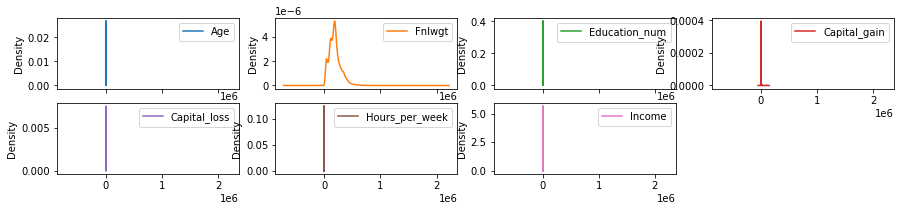

In [28]:
#to check Distribution of skewness, almost there is no skewd data expect fnlwgt column.
df.plot(kind='kde',subplots=True,layout=(4,4),figsize=(15,6)) 

### Encoding the data
Since majority of the classification models need input as ‘int/float’, and do not work on ‘string’ data, 
we encode our categorical columns using ‘Label Encoder’

In [29]:
from sklearn.preprocessing import LabelEncoder # having string data need to convert into numric for further calculations.
lb=LabelEncoder()
df['Workclass']=lb.fit_transform(df['Workclass'])
df['Education']=lb.fit_transform(df['Education'])
df['Marital_status']=lb.fit_transform(df['Marital_status'])
df['Occupation']=lb.fit_transform(df['Occupation'])
df['Relationship']=lb.fit_transform(df['Relationship'])
df['Race']=lb.fit_transform(df['Race'])
df['Sex']=lb.fit_transform(df['Sex'])
df['Native_country']=lb.fit_transform(df['Native_country'])

### Data Visualizations

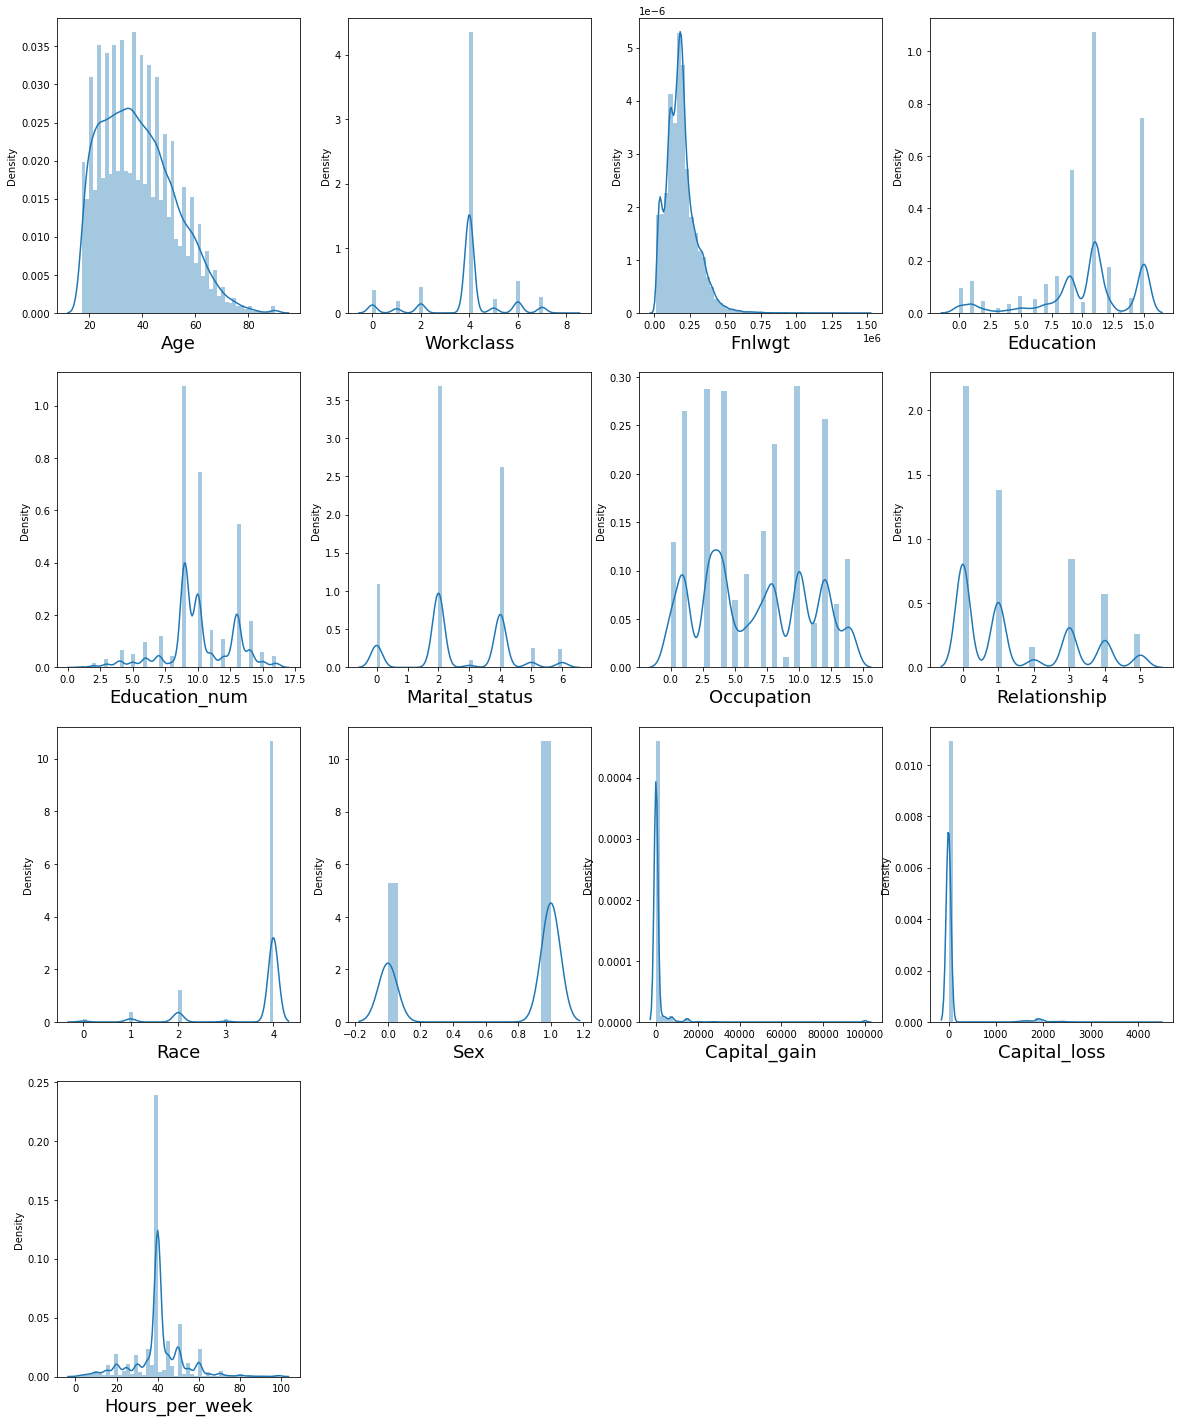

In [30]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
                                    
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

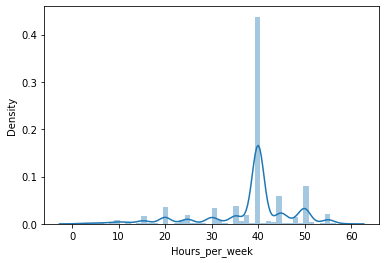

In [31]:
sns.distplot(df1['Hours_per_week'])

In [32]:
from scipy.stats import boxcox #Removing Fnlwgt column skewd data 
df['Fnlwgt']=boxcox(df['Fnlwgt'],0)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

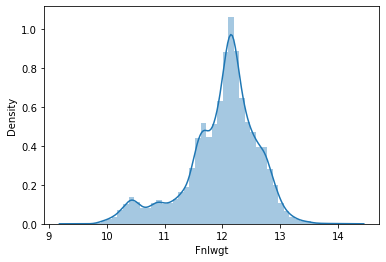

In [33]:
sns.distplot(df['Fnlwgt']) # after Removing skewness data shown like normal distribution.

<AxesSubplot:xlabel='count', ylabel='Workclass'>

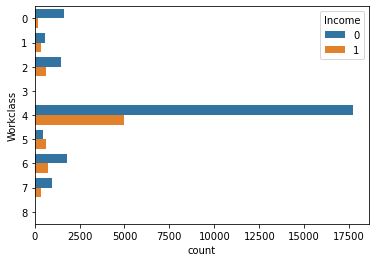

In [34]:
sns.countplot(y='Workclass',hue='Income',data=df)

<AxesSubplot:xlabel='count', ylabel='Occupation'>

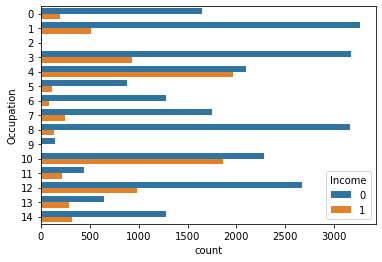

In [35]:
sns.countplot(y='Occupation',hue='Income',data=df)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>],
       [<AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>]],
      dtype=object)

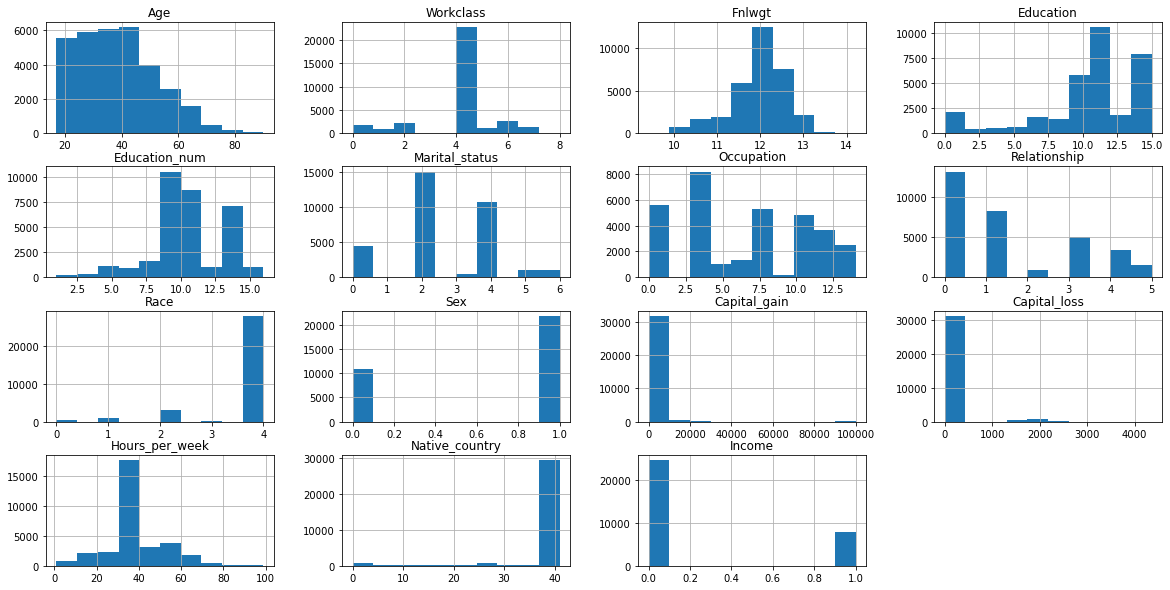

In [36]:
df.hist(figsize=(20,10))

### Since the outcome has two variable we will use Binary Classification Model.

### Train Test Split
     separating the columns into features and target:

In [77]:
# Dividing the dataset into independent and dependent data before scaling
x=df.drop(columns='Income',axis=1)
y=df['Income']

### Standard Scaler

In [38]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [39]:
x=pd.DataFrame(x)

In [40]:
# Importing necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split 

### Fitting data into classification models-
We now proceed to the main step of our machine learning, fitting the model and predicting the outputs.
We fit the data into multiple classification models to compare the performance of all models and select the best model

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

### Find the  beast Random_state use here (currently we are moving shead with Random_state 42)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [80]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(32560, 14) (26048, 14) (6512, 14)
(32560,) (26048,) (6512,)


In [44]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

### Find the  beast Random_state use here ( Random_state 13)

In [45]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model perform very well")
        print("At random_state:-",i)
        print("Accuracy_Score_train :-",accuracy_score(y_train,pred_train)*100)
        print("Accuracy_Score_test :-",accuracy_score(y_test,pred_test)*100)


At random state 13 The model perform very well
At random_state:- 13
Accuracy_Score_train :- 82.4593058968059
Accuracy_Score_test :- 82.46314496314497
At random state 29 The model perform very well
At random_state:- 29
Accuracy_Score_train :- 82.49769656019656
Accuracy_Score_test :- 82.47850122850123
At random state 49 The model perform very well
At random_state:- 49
Accuracy_Score_train :- 82.5168918918919
Accuracy_Score_test :- 82.47850122850123
At random state 54 The model perform very well
At random_state:- 54
Accuracy_Score_train :- 82.5168918918919
Accuracy_Score_test :- 82.46314496314497
At random state 63 The model perform very well
At random_state:- 63
Accuracy_Score_train :- 82.44011056511057
Accuracy_Score_test :- 82.4477886977887
At random state 66 The model perform very well
At random_state:- 66
Accuracy_Score_train :- 82.45162776412776
Accuracy_Score_test :- 82.50921375921376
At random state 82 The model perform very well
At random_state:- 82
Accuracy_Score_train :- 82.509

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)

### Model Training Logistic Classification

In [47]:
pred=lg.predict(x_test)
print("Accuracy_Score ::",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred)) 

Accuracy_Score :: 0.8253992628992629
[[4599  289]
 [ 848  776]]


### AUC ROC Curve

In [48]:
from sklearn.metrics import roc_curve,roc_auc_score
auc=roc_auc_score(y_test,pred)
fpr,tpr,thresholds=roc_curve(y_test,pred)

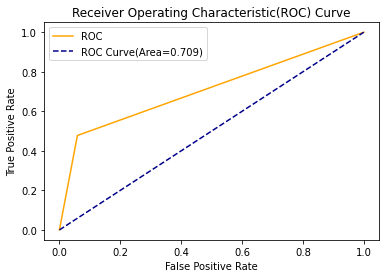

In [49]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Ensemble method :

In [50]:
# Bagging & Boosting:
# We further try fitting the data to classification models to check how our ensemble models perform on the given dataset.
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [51]:
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)
for i in [rf,ad,gd]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<= 0.01:
        print(i)
        print('Accuracy score for train data',accuracy_score(y_test,pred))
        print('Accuracy score for test data',accuracy_score(y_train,i.predict(x_train)))
        print(classification_report(y_test,pred))
        print(confusion_matrix(y_test,pred))
        print('--------------------------------------')
        

AdaBoostClassifier()
Accuracy score for train data 0.8617936117936118
Accuracy score for test data 0.8604773604773605
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7412
           1       0.77      0.61      0.68      2356

    accuracy                           0.86      9768
   macro avg       0.83      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768

[[6981  431]
 [ 919 1437]]
--------------------------------------
GradientBoostingClassifier()
Accuracy score for train data 0.8701883701883701
Accuracy score for test data 0.8671902421902422
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7412
           1       0.80      0.62      0.70      2356

    accuracy                           0.87      9768
   macro avg       0.84      0.78      0.81      9768
weighted avg       0.87      0.87      0.86      9768

[[7048  364]
 [ 904 1452]]
---------

In [53]:
from sklearn.model_selection import KFold

score=cross_val_score(gd,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.86210074 0.86148649 0.8647113  0.86778256 0.86394349]
0.864004914004914
0.0022244863589965477


In [54]:
parameters={'loss':['deviance','exponential'],'criterion':['friedman_mse','squared_error']}
gd=GradientBoostingClassifier()

clf=GridSearchCV(gd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

# We receive the best params for our model, which result in a best score of 87.7%.
 # We increased our model accuracy by 1% using hypertuning.

{'criterion': 'friedman_mse', 'loss': 'exponential'}
0.8630659056371819


In [55]:
from sklearn.ensemble import RandomForestClassifier
gd=GradientBoostingClassifier(criterion='friedman_mse',loss='exponential')

gd.fit(x_train,y_train)
gd.score(x_train,y_train)
predgd=gd.predict(x_test)
print(accuracy_score(y_test,predgd))
print(confusion_matrix(y_test,predgd))
print(classification_report(y_test,predgd))

0.8696764946764947
[[7034  378]
 [ 895 1461]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7412
           1       0.79      0.62      0.70      2356

    accuracy                           0.87      9768
   macro avg       0.84      0.78      0.81      9768
weighted avg       0.86      0.87      0.86      9768



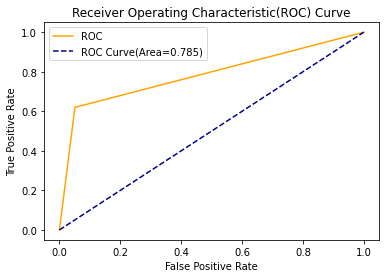

In [56]:
auc=roc_auc_score(y_test,predgd)
fpr,tpr,thresholds=roc_curve(y_test,predgd)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Ensemble method :
 ###        Random Forest Classifier:Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [57]:
parameters={'n_estimators':[100],'criterion':['gini','entropy']}
rf=RandomForestClassifier()

clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'criterion': 'gini', 'n_estimators': 100}
0.8531501321323536


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='gini')
#rf.RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8576986076986077
[[6878  534]
 [ 856 1500]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7412
           1       0.74      0.64      0.68      2356

    accuracy                           0.86      9768
   macro avg       0.81      0.78      0.80      9768
weighted avg       0.85      0.86      0.85      9768



In [59]:
from sklearn.model_selection import KFold

score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.85426904 0.85396192 0.85795455 0.86286855 0.85918305]
0.8576474201474202
0.003307840790623173


### Random Forest Classifier:
### since cross validation score accuracy score are almost same.we are heading with a good approach.

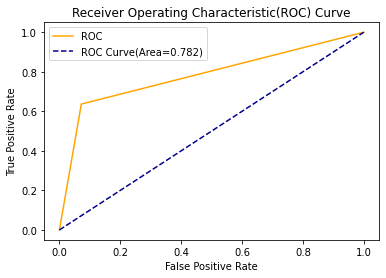

In [60]:
auc=roc_auc_score(y_test,predrf)
fpr,tpr,thresholds=roc_curve(y_test,predrf)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

###  DecisionTreeClassifier :Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [61]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)                      #DesicisionTreeClassifier having highest score with cross validation 
best_result=gd_sr.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'entropy'}
0.8134520884520885
0.81


In [62]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8085585585585585
[[6400 1012]
 [ 858 1498]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7412
           1       0.60      0.64      0.62      2356

    accuracy                           0.81      9768
   macro avg       0.74      0.75      0.74      9768
weighted avg       0.81      0.81      0.81      9768



In [63]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.8046683  0.80605037 0.80712531 0.81434275 0.80574324]
0.807585995085995
0.003467932982382135


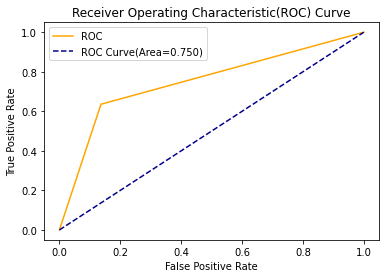

In [64]:
auc=roc_auc_score(y_test,preddtc)
fpr,tpr,thresholds=roc_curve(y_test,preddtc)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Support vector Machine Model,Cross Validation ,Hyperparameter Tuning

In [65]:
from sklearn.svm import SVC

parameters={'kernel':['linear','poly','rbf']}
svc=SVC() #(kernel='rbf')

clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'kernel': 'rbf'}
0.8457789591318005


In [66]:
# Support Vector classifier
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8518632268632269
[[7019  393]
 [1054 1302]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7412
           1       0.77      0.55      0.64      2356

    accuracy                           0.85      9768
   macro avg       0.82      0.75      0.77      9768
weighted avg       0.85      0.85      0.84      9768



In [67]:
cv_score=cross_val_score(svc,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8481572481572481

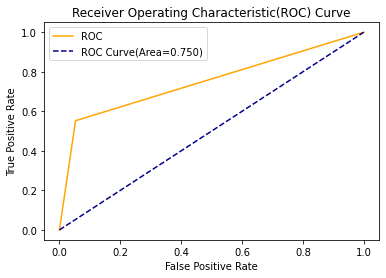

In [68]:
auc=roc_auc_score(y_test,predsvc)
fpr,tpr,thresholds=roc_curve(y_test,predsvc)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

###  MultinomialNB GridSearchCV ,Cross Validation ,Model Develop 

In [81]:
parameters={'alpha':[1.0],'fit_prior':['bool']}
mnb=MultinomialNB()
clf=GridSearchCV(mnb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'alpha': 1.0, 'fit_prior': 'bool'}
0.7787927214414443


In [82]:
# MultinomialNB 
mnb=MultinomialNB(alpha=1.0,fit_prior='bool')
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7807125307125307
[[4727  185]
 [1243  357]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4912
           1       0.66      0.22      0.33      1600

    accuracy                           0.78      6512
   macro avg       0.73      0.59      0.60      6512
weighted avg       0.76      0.78      0.74      6512



In [83]:
# KFold Cross Validation
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77856265 0.77641278 0.78270885 0.77564496 0.78255528]
0.7791769041769042
0.0029792737869232854


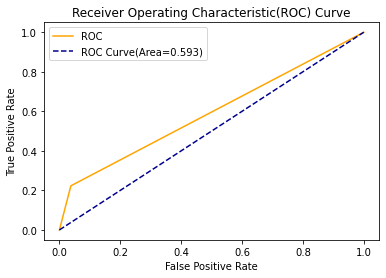

In [84]:
auc=roc_auc_score(y_test,predmnb)
fpr,tpr,thresholds=roc_curve(y_test,predmnb)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### gd=GradientBoostingClassifier()

#we are getting gd model accuracy 0.87 Cross validation Score 0.86 Hyperparameter tuning Grid Search CV Score 0.86 which is best.so our model performing extremely well.
 
#since cross validation score accuracy score are almost same.we are heading with a good approach.

### Saving Best Model

In [88]:
# We further proceed to test the object that we saved using joblib or pickle, and create a dataframe of predicted values. 
import pickle 
filename='Census_Income.pkl'
pickle.dump(gd,open(filename,'wb'))

### Conclusion:

In [89]:
# Following are the results that we achieve, with an accuracy of 87%.
import numpy as np
a=np.array(y_test)
predicted=np.array(gd.predict(x_test))
df=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df

,Original,Predicted
0,0,1
1,0,1
2,1,0
3,1,0
4,0,0
...,...,...
6507,1,0
6508,0,0
6509,0,1
6510,0,0


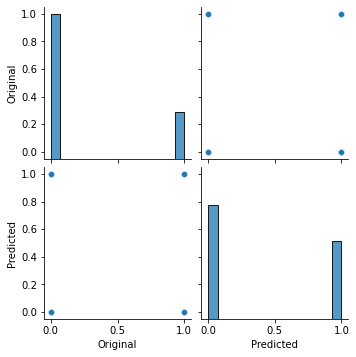

In [90]:
# This marks the end of our process; 
# we have successfully trained our model to predict the income of a person, with an accuracy of ~87%
sns.pairplot(df)